```{admonition} Внимание!
:class: warning
Данная страница инициализирована в статичном режиме – все графики неинтерактивны. При необходимости Вы можете посмотреть [интерактивную копию](RG-3-StressRotation-PrincipleStresses-MohrCircles-Part1-I.md) данной страницы.
```

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget
from matplotlib.patches import Rectangle, Polygon, Wedge
from ipywidgets import widgets, interact
from IPython.display import HTML, display
import sys
sys.path.append('../../SupportCode/')
from Graphics import plot_angle_arc

<a id='geomech-rg-stress_rotation-1'></a>
# Базис тензора напряжений. Главные напряжения. Круги Мора. Часть 1
Тензор напряжения, по своей сути, является матрицей [линейного преобразования](../../0-Math/1-LAB/LAB-8-LinearTransformations.html#math-lab-linear_transform) вектора нормали выбранной площадки в вектор напряжения, приложенной к данной площадке. Из этого следует, что элементы тензора напряжения будут зависеть от выбранного базиса (плоскости рассматриваемой площадки). Проиллюстрируем это на следующем примере. Пусть имеется некоторое тело, к которому приложены растягивающие силы $\vec{F}$ (для упрощения представим его в двухмерном пространстве).

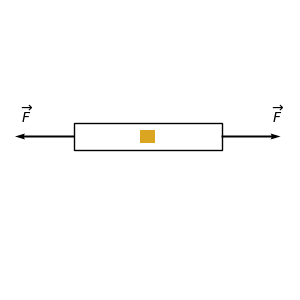

In [2]:
fig, ax = plt.subplots(frameon=False, figsize=(3, 3))
fig.canvas.header_visible = False

x0 = [5, 0]
y0 = [0.5, 0.5]

U = [[2, -2]]
V = [[0, 0]]

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'r'], zorder=2)
ax.text(6.7, 1.0, '$\\overrightarrow{F}$')
ax.text(-1.8, 1.0, '$\\overrightarrow{F}$')

ax.add_patch(Rectangle((0, 0), 5, 1, fc='w', ec='k'))
ax.add_patch(Rectangle((2.25, 0.25), 0.5, 0.5, fc='goldenrod', ec=None, angle=0))

ax.set_xlim(-2, 7)
ax.set_ylim(-5, 5)
ax.axis('off')
fig.patch.set_visible(False)

fig.tight_layout()

Мысленно выделим из данного тела элементарный объем и рассмотрим приложенные к нему векторы напряжения относительно стандартного базиса $(\vec{i}, \vec{j})$. Принимая во внимание [принцип Сен-Венана](./RG-1-LinearElasticityAssumptions.html#geomech-rg-assumptions) вектор напряжения, действующий на данное тело, будет равен отношению силы $\vec{F}$ к площади поверхности площадки элементарного объема.

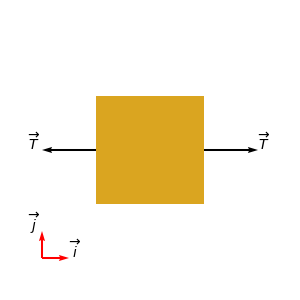

In [3]:
fig, ax = plt.subplots(frameon=False, figsize=(3, 3))
fig.canvas.header_visible = False

x0 = [2, -2, -4, -4]
y0 = [0, 0, -4, -4]

U = [[2, -2, 1, 0]]
V = [[0, 0, 0, 1.0]]

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'r', 'r'], zorder=2)
ax.text(4.0, 0.0, '$\\overrightarrow{T}$')
ax.text(-4.5, 0.0, '$\\overrightarrow{T}$')
ax.text(-3.0, -4.0, '$\\overrightarrow{i}$')
ax.text(-4.5, -3.0, '$\\overrightarrow{j}$')

ax.add_patch(Rectangle((-2, -2), 4, 4, fc='goldenrod', ec=None))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
fig.patch.set_visible(False)

fig.tight_layout()

Поскольку векторы напряжения $\vec{T}$ коллинеарны с базисным вектором $\vec{i}$, то на элементарный объем действует только *нормальное напряжение* (перпендикулярное к рассматриваемой площадке).

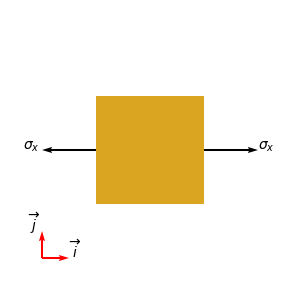

In [4]:
fig, ax = plt.subplots(frameon=False, figsize=(3, 3))
fig.canvas.header_visible = False

x0 = [2, -2, -4, -4]
y0 = [0, 0, -4, -4]

U = [[2, -2, 1, 0]]
V = [[0, 0, 0, 1.0]]

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'r', 'r'], zorder=2)
ax.text(4.0, 0.0, '$\\sigma_x$')
ax.text(-4.7, 0.0, '$\\sigma_x$')
ax.text(-3.0, -4.0, '$\\overrightarrow{i}$')
ax.text(-4.5, -3.0, '$\\overrightarrow{j}$')

ax.add_patch(Rectangle((-2, -2), 4, 4, fc='goldenrod', ec=None))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
fig.patch.set_visible(False)

fig.tight_layout()

Но что если мы выделим элементарный объем под углом $\theta$ к горизонтали?

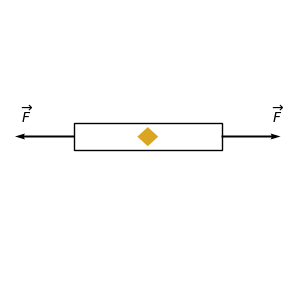

In [5]:
fig, ax = plt.subplots(frameon=False, figsize=(3, 3))
fig.canvas.header_visible = False

x0 = [5, 0]
y0 = [0.5, 0.5]

U = [[2, -2]]
V = [[0, 0]]

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'r'], zorder=2)
ax.text(6.7, 1.0, '$\\overrightarrow{F}$')
ax.text(-1.8, 1.0, '$\\overrightarrow{F}$')

ax.add_patch(Rectangle((0, 0), 5, 1, fc='w', ec='k'))
ax.add_patch(Rectangle((2.5, 0.141), 0.5, 0.5, fc='goldenrod', ec=None, angle=45))

ax.set_xlim(-2, 7)
ax.set_ylim(-5, 5)
ax.axis('off')
fig.patch.set_visible(False)

fig.tight_layout()

Тогда на каждую площадку будет оказываться воздействие со стороны внутренних сил под углом $\theta$. Данный вектор можно разложить на две составляющие: нормальную и касательную по отношению к рассматриваемой площадке.

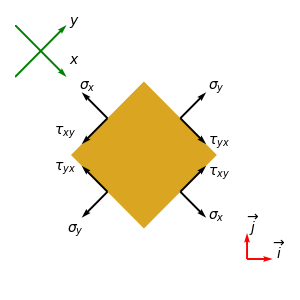

In [6]:
fig, ax = plt.subplots(frameon=False, figsize=(3, 3))
fig.canvas.header_visible = False

x0 = [1.414, 1.414, 1.414, 1.414, -1.414, -1.414, -1.414, -1.414, 4, 4, -5, -5]
y0 = [1.414, 1.414, -1.414, -1.414, 1.414, 1.414, -1.414, -1.414, -4, -4, 3, 5]

U = [[1, 1, 1, 1, -1, -1, -1, -1, 1, 0, 2, 2]]
V = [[1, -1, -1, 1, 1, -1, -1, 1, 0, 1, 2, -2]]

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy',
          color=['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'r', 'r', 'g', 'g'], zorder=2)
ax.text(2.5, 2.5, '$\\sigma_y$')
ax.text(2.5, 0.4, '$\\tau_{yx}$')
ax.text(2.5, -2.5, '$\\sigma_x$')
ax.text(2.5, -0.8, '$\\tau_{xy}$')
ax.text(-3.0, -3.0, '$\\sigma_y$')
ax.text(-3.5, -0.6, '$\\tau_{yx}$')
ax.text(-2.5, 2.5, '$\\sigma_x$')
ax.text(-3.5, 0.8, '$\\tau_{xy}$')
ax.text(5.0, -4.0, '$\\overrightarrow{i}$')
ax.text(4.0, -3.0, '$\\overrightarrow{j}$')
ax.text(-2.9, 5.0, '$y$')
ax.text(-2.9, 3.5, '$x$')

ax.add_patch(Rectangle((0, -1.414*2), 4, 4, fc='goldenrod', ec=None, angle=45))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
fig.patch.set_visible(False)

fig.tight_layout()

Поскольку элементарный объем можно выделить под любым углом по отношению к направлению действия силы, то данные проекции вектора напряжения будут постоянно меняться – зависеть от выбранного базиса (углов наклона площадок к вектору приложенной нагрузки). Для определения этой зависимости рассечем элементарный объем плоскостью, расположенной под углом $\theta$, и рассмотрим равновесное состояние полученной призмы:

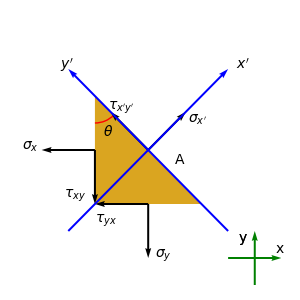

In [7]:
fig, ax = plt.subplots(frameon=False, figsize=(3, 3))
fig.canvas.header_visible = False

x0 = [-2, -2, 0, 0, 0, 0, 3, 4, -3, 3]
y0 = [0, 0, -2, -2, 0, 0, -4, -5, -3, -3]

U = [[-2, 0, 0, -2, 1.414, -1.414, 2, 0, 6, -6]]
V = [[0, -2, -2, 0, 1.414, 1.414, 0, 2, 6, 6]]

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy',
          color=['k', 'k', 'k', 'k', 'k', 'k', 'g', 'g', 'b', 'b'], zorder=2)

ax.text(-4.75, 0, '$\\sigma_x$')
ax.text(-3.15, -1.75, '$\\tau_{xy}$')
ax.text(0.25, -4, '$\\sigma_y$')
ax.text(-2, -2.7, '$\\tau_{yx}$')
ax.text(1.5, 1.0, '$\\sigma_{x\'}$')
ax.text(-1.5, 1.5, '$\\tau_{x\'y\'}$')
ax.text(4.8, -3.8, 'x')
ax.text(3.4, -3.4, 'y')
ax.text(3.4, -3.4, 'y')
ax.text(3.3, 3.0, '$x\'$')
ax.text(-3.3, 3.0, '$y\'$')
ax.text(-1.7, 0.5, '$\\theta$')
ax.text(1, -0.5, 'A')

ax.add_patch(Polygon([[-2, -2], [-2, 2], [2, -2]], fc='goldenrod', ec=None))

plot_angle_arc(ax, -2, 2, -90, -45, 2.0, 1, color='r')

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
fig.patch.set_visible(False)

fig.tight_layout()

Запишем проекции сил на оси $Ox'$ и $Oy'$, выраженные через произведения напряжений и площадей поверхностей призмы, к которым они приложены:

$$ \begin{align}
Ox' &: \sigma_{x'} A - \sigma_x \cos{\theta} \cdot A \cos{\theta} - \tau_{xy} \sin{\theta} \cdot A \cos{\theta} - \tau_{yx} \cos{\theta} \cdot A \sin{\theta} - \sigma_y \sin{\theta} \cdot A \sin{\theta} = 0 \\
Ox' &: \sigma_{x'} = \sigma_x \cos^2{\theta} + \tau \sin{2\theta} + \sigma_y \sin^2{\theta} \\
Oy' &: \tau_{x'y'} A + \sigma_x \sin{\theta} \cdot A \cos{\theta} - \tau_{xy} \cos{\theta} \cdot A \cos{\theta} + \tau_{yx} \sin{\theta} \cdot A \sin{\theta} - \sigma_y \cos{\theta} \cdot A \cos{\theta} = 0 \\
Oy' &: \tau_{x'y'} = (\sigma_y - \sigma_x) sin{\theta} \cos{\theta} + \tau (\cos^2{\theta} - \sin^2{\theta}).
\end{align} $$

```{admonition} NB
При преобразовании выражений было применено упрощение $\tau_{xy} = \tau_{yx} = \tau$, обусловленное нахождением элементарного объема в равновесии (крутящий момент, приложенный к данному объекту равен нулю).
```

Дополняя приведенные выше уравнения выражением для $\sigma_{y'}$, полученное преобразованием выражения для $\sigma_{x'}$ путем подстановки вместо $\theta$ угла $\theta + \frac{\pi}{2}$, получим:

$$\left\{\begin{array} \\ \sigma_{x'} = \sigma_x \cdot \cos^2{\theta} + \tau \cdot \sin{2\theta} + \sigma_y \cdot \sin^2{\theta} \\ \tau_{x'y'} = (\sigma_y - \sigma_x) \cdot sin{\theta} \cdot \cos{\theta} + \tau \cdot (\cos^2{\theta} - \sin^2{\theta}) \\ \sigma_{y'} = \sigma_x \cdot \sin^2{\theta} - \tau \cdot \sin{2\theta} + \sigma_y \cdot \cos^2{\theta} \end{array} \right.$$

Это же выражение может быть получено и записано в матричном виде. Поскольку тензор напряжений является матрицей линейного преобразования вектора нормали в вектор напряжений, записанный в стандартном базисе:

$$\vec{T} = S \cdot \vec{n},$$

то это же линейное преобразование в другом базисе $B$ [может](../../0-Math/1-LAB/LAB-8-LinearTransformations.html#math-lab-linear_transform) быть записано следующим образом:

$$\begin{bmatrix} \vec{T} \end{bmatrix}_B = D \cdot \begin{bmatrix} \vec{n} \end{bmatrix}_B \\ D = Q \cdot S \cdot Q^{-1}$$

Здесь матрица $Q$ представляет собой матрицу перехода от стандартного базиса к базису $B$. Для ее получения рассмотрим следующий пример. Пусть имеется два напряжения $\sigma_1$ и $\sigma_2$ в стандартном базисе. Необходимо определить координаты напряжений $\sigma_{1'}$ и $\sigma_{2'}$ относительно нового базиса (осей $x'$ и $y'$), повернутого на угол $\alpha$ относительно стандартного. В данном случае ось $z$ направлена от читателя. Положительное направление угла $\alpha$ выбрано в соответствии с [положительным направлением вращения правой системы координат](https://en.wikipedia.org/wiki/Right-hand_rule).

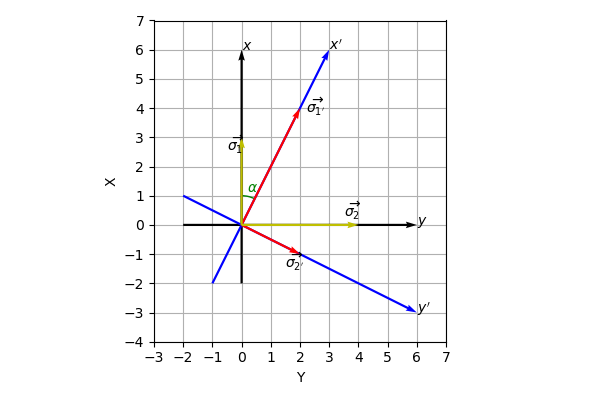

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.header_visible = False

x0 = [-2, 0, -2, -1, 0, 0, 0, 0]
y0 = [0, -2, 1, -2, 0, 0, 0, 0]

U = [[8, 0, 8, 4, 2, 2, 0, 4]]
V = [[0, 8, -4, 8, 4, -1, 3, 0]]

plot_angle_arc(ax, 0, 0, np.rad2deg(np.arctan(2)), 90, 2.0, 1, color='g')

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'b', 'b', 'r', 'r', 'y', 'y'], zorder=3)

ax.text(6, 0, '$y$')
ax.text(0, 6, '$x$')
ax.text(6, -3, '$y\'$')
ax.text(3, 6, '$x\'$')
ax.text(2.2, 3.8, '$\\overrightarrow{\\sigma_{1\'}}$')
ax.text(-0.5, 2.5, '$\\overrightarrow{\\sigma_{1}}$')
ax.text(1.5, -1.5, '$\\overrightarrow{\\sigma_{2\'}}$')
ax.text(3.5, 0.25, '$\\overrightarrow{\\sigma_{2}}$')
ax.text(0.17, 1.11, '$\\alpha$', c='g')

ax.set_xlim(-3, 7)
ax.set_ylim(-3, 7)
ax.set_xticks(range(-3, 8))
ax.set_yticks(range(-4, 8))
ax.set_aspect('equal', adjustable='box')
ax.set_axisbelow(True)
ax.grid()
ax.set_xlabel('Y')
ax.set_ylabel('X');

fig.tight_layout()

Суть вращения заключается в том, что каким бы то ни было образом повернутые оси не должны изменять напряженное состояние исследуемого объекта. На основании этого можно записать следующие проекции векторов на оси $Ox'$ и $Oy'$ соответственно:

$$\sigma_{1'} = \sigma_1 \cdot \cos{\alpha} + \sigma_2 \cdot \sin{\alpha} \\ \sigma_{2'} = -\sigma_1 \cdot \sin{\alpha} + \sigma_2 \cdot \cos{\alpha}$$

Матричная запись данной системы уравнений:

$$\begin{bmatrix} \sigma_{1'} \\ \sigma_{2'} \end{bmatrix} = \begin{bmatrix} \cos{\alpha} & \sin{\alpha} \\ -\sin{\alpha} & \cos{\alpha} \end{bmatrix} \cdot \begin{bmatrix} \sigma_{1} \\ \sigma_{2} \end{bmatrix}$$

Таким образом, матрица

$$Q = \begin{bmatrix} \cos{\alpha} & \sin{\alpha} \\ -\sin{\alpha} & \cos{\alpha} \end{bmatrix}$$

является матрицей вращения напряжений в двухмерном пространстве.

Рассмотрим пример. Пусть в стандартном двухмерном базисе тензор напряжения:

$$S = \begin{bmatrix} 20 & 10 \\ 10 & 7 \end{bmatrix}$$

Необходимо определить тензор напряжения при повороте базиса на угол $\frac{\pi}{6}$. Если воспользоваться формулами, выведенными при рассмотрении равновесного состояния призмы, то получим следующие значения напряжений:

In [9]:
sx = 20
sy = 7
t = 10
alpha = np.pi / 6
sx_new = sx * (np.cos(alpha)) ** 2 + t * np.sin(2 * alpha) + sy * (np.sin(alpha))**2
t_new = (sy - sx) * np.sin(alpha) * np.cos(alpha) + t * ((np.cos(alpha))**2 - (np.sin(alpha))**2)
sy_new = sx * (np.sin(alpha)) ** 2 - t * np.sin(2 * alpha) + sy * (np.cos(alpha))**2
sx_new, t_new, sy_new

(25.41025403784439, -0.629165124598849, 1.5897459621556145)

Такой же результат получается при использовании матрицы вращения тензора напряжений:

In [10]:
S = np.array([[20, 10], [10, 7]])
Q = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
Q.dot(S).dot(np.linalg.inv(Q))

array([[25.41025404, -0.62916512],
       [-0.62916512,  1.58974596]])

Проиллюстрируем изменение значений нормальных и касательных напряжений при повороте базиса на произвольное значение угла. Ниже приведена интерактивная диаграмма, позволяющая определить тензор напряжений при любых значениях угла поворота базиса. На первой диаграмме изображено вращение рассматриваемой элементарной площадки из условия сохранения исходного напряженного состояния. На второй диаграмме показано изменение значений нормальных и касательных составляющих тензора напряжений при вращении площадки. Третья диаграмма представляет собой график изменения нормальной и касательной координат вектора напряжения при повороте площадки на некоторый угол. Эти координаты определялись следующим образом. Вектор напряжения, согласно закону Коши, равен произведению тензора напряжений на нормаль к рассматриваемой площадке:

$$\vec{T} = S \cdot \vec{n}$$

Координаты нормали к площадки являются направляющими косинусами вектора нормали и могут быть выражены через угол поворота площадки $\alpha$:

$$\vec{n} = \begin{bmatrix} \cos{\alpha} \\ \sin{\alpha} \end{bmatrix}$$

Единичный вектор, лежащий в плоскости площадки, будет иметь координаты:

$$\vec{s} = \begin{bmatrix} -\sin{\alpha} \\ \cos{\alpha} \end{bmatrix}$$

Проекция вектора на некоторую ось (в данном случае – на нормаль) равняется произведению данного вектора на единичный вектор оси (то есть на вектор нормали), тогда:

$$T_n = \vec{T} \cdot \vec{n} = S \cdot \vec{n} \cdot \vec{n}$$

Проекция вектора напряжения на плоскость будет равна:

$$T_s = \vec{T} \cdot \vec{s} = S \cdot \vec{n} \cdot \vec{s}$$

interactive(children=(FloatSlider(value=5.0, description='sx', max=5.0, step=0.01), FloatSlider(value=3.0, des…

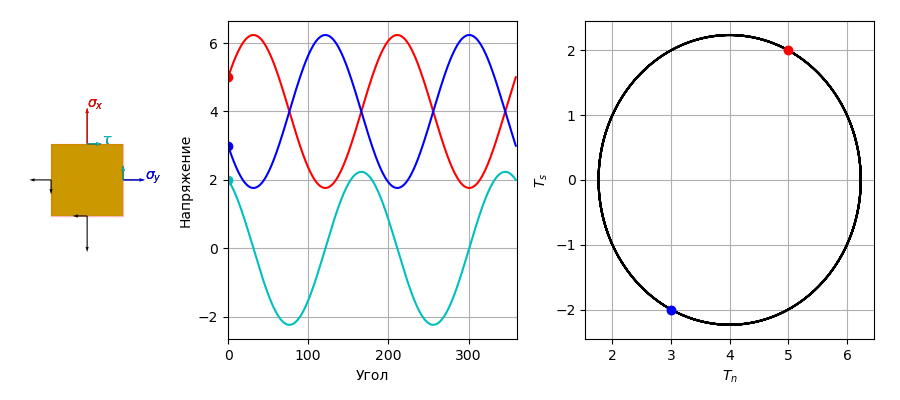

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(9, 4), gridspec_kw={'width_ratios': [1, 2, 2]})
fig.canvas.header_visible = False

ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)
ax[0].set_aspect('equal', adjustable='box')
ax[0].axis('off')
colors = ['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'b', 'r', 'c', 'c']

ax[1].set_xlim(0, 360)
ax[1].grid()
ax[1].set_ylabel('Напряжение')
ax[1].set_xlabel('Угол')
angles = range(0, 360, 1)

ax[2].grid()
ax[2].set_ylabel('$T_s$')
ax[2].set_xlabel('$T_n$')

fig.tight_layout()

removing = [mpl.quiver.Quiver, mpl.patches.Rectangle, mpl.patches.Wedge, mpl.text.Text, mpl.lines.Line2D]

@interact(sx=widgets.FloatSlider(min=0, max=5.0, step=0.01, value=5.0),
          sy=widgets.FloatSlider(min=0, max=5.0, step=0.01, value=3.0),
          t=widgets.FloatSlider(min=-5.0, max=5.0, step=0.01, value=2.0),
          alpha=widgets.IntSlider(min=0, max=360, step=1, value=0))
def rotation_2d(sx, sy, t, alpha):
    for i in range(3):
        for child in ax[i].get_children():
            if type(child) in removing:
                try:
                    child.remove()
                except:
                    pass
    ax[0].add_patch(Rectangle((-5, -5), 10, 10, fc='y', ec=None, angle=0))
    alpha = np.pi * alpha / 180
    S = np.array([[sx, t], [t, sy]])
    sx = S[0, 0]
    sy = S[1, 1]
    tau = S[0, 1]
    Q = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
    S_new = Q.dot(S).dot(np.linalg.inv(Q))
    sx_new = S_new[0, 0]
    sy_new = S_new[1, 1]
    tau_new = S_new[0, 1]
    new_coords = Q.dot(np.array([[5, 0, 0, 5], [0, 5, 5, 0]]))
    x0 = [0, 5, 0, -5, 0, 5, 0, -5, new_coords[0][0], new_coords[0][1], new_coords[0][2], new_coords[0][3]]
    y0 = [5, 0, -5, 0, 5, 0, -5, 0, new_coords[1][0], new_coords[1][1], new_coords[1][2], new_coords[1][3]]
    U = [[0, sy, 0, -sy, tau, 0, -tau, 0, sy_new * np.cos(alpha), sx_new * np.sin(alpha), tau_new * np.cos(alpha), tau_new * np.sin(alpha)]]
    V = [[sx, 0, -sx, 0, 0, tau, 0, -tau, -sy_new * np.sin(alpha), sx_new * np.cos(alpha), -tau_new * np.sin(alpha), tau_new * np.cos(alpha)]]
    ax[0].quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=colors, zorder=3)
    ax[0].add_patch(Rectangle((-5, -5), 10, 10, fc='r', ec='r',\
                              transform=mpl.transforms.Affine2D().rotate_around(0, 0, -alpha) + ax[0].transData, alpha=0.2))
    ax[0].text(0, 5 + sx, '$\\sigma_x$')
    ax[0].text(5 + sy, 0, '$\\sigma_y$')
    ax[0].text(t, 5, '$\\tau$')
    ax[0].text(new_coords[0][0] + sy_new * np.cos(alpha), new_coords[1][0] - sy_new * np.sin(alpha), '$\\sigma_y$', c='b')
    ax[0].text(new_coords[0][1] + sx_new * np.sin(alpha), new_coords[1][1] + sx_new * np.cos(alpha), '$\\sigma_x$', c='r')
    ax[0].text(new_coords[0][2] + tau_new * np.cos(alpha), new_coords[1][2] - tau_new * np.sin(alpha), '$\\tau$', c='c')
    stress = [[], [], []]
    tn = []
    ts = []
    for theta in np.linspace(0, 2*np.pi, 360):
        q = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
        temp_matrix = q.dot(S).dot(np.linalg.inv(q))
        stress[0].append(temp_matrix[0, 0])
        stress[1].append(temp_matrix[1, 1])
        stress[2].append(temp_matrix[0, 1])
        n = np.array([np.cos(theta), np.sin(theta)])
        s = np.array([-np.sin(theta), np.cos(theta)])
        T = temp_matrix.dot(np.transpose(n))
        tn.append(T.dot(n))
        ts.append(T.dot(s))
    ax[1].plot(angles, stress[0], c='r')
    ax[1].plot(angles, stress[1], c='b')
    ax[1].plot(angles, stress[2], c='c')
    ax[1].plot(alpha * 180 / np.pi, sy_new, c='b', lw=0, marker='o')
    ax[1].plot(alpha * 180 / np.pi, sx_new, c='r', lw=0, marker='o')
    ax[1].plot(alpha * 180 / np.pi, tau_new, c='c', lw=0, marker='o')
    ax[2].add_patch(Wedge(((sx + sy) / 2, 0), np.sqrt((sx - sy)**2 + 4 * tau**2) / 2,
                          (np.arctan(2 * tau / (sx - sy)) - alpha * 2) * 180 / np.pi, np.arctan(2 * tau / (sx - sy)) * 180 / np.pi,
                          color='r', alpha=0.1, ec=None))
    ax[2].add_patch(Wedge(((sx + sy) / 2, 0), np.sqrt((sx - sy)**2 + 4 * tau**2) / 2,
                          (np.arctan(2 * tau / (sx - sy)) - alpha * 2) * 180 / np.pi - 180, np.arctan(2 * tau / (sx - sy)) * 180 / np.pi - 180,
                          color='b', alpha=0.1, ec=None))
    ax[2].plot(tn, ts, c='k')
    ax[2].plot(sy, -tau, c='b', lw=0, marker='o', alpha=0.25)
    ax[2].plot(sx, tau, c='r', lw=0, marker='o', alpha=0.25)
    ax[2].plot(sy_new, -tau_new, c='b', lw=0, marker='o')
    ax[2].plot(sx_new, tau_new, c='r', lw=0, marker='o')
    pass

```{admonition} NB
Проанализируем полученные результаты:
* значения нормальных и касательных напряжений, действительно, зависят от поворота базиса;
* при изменении угла поворота базиса от $0$ до $2 \pi$ значения напряжений изменяются периодически;
* при построении графика зависимости касательного напряжения от нормального получается окружность, называемая ***кругом Мора***;
* угол отклонения радиуса круга Мора при повороте базиса на угол $\theta$ равен $2 \theta$;
* существуют такие углы поворота базиса, при которых касательные напряжения равны нулю, такие положения (площадки) называются главными, а действующие на данные площадки нормальные напряжения соответственно – ***главными напряжениями*** (*principle stresses*);
* при любых исходных соотношениях нормальных и касательных напряжений всегда существует такое положениие базиса, при котором касательные напряжения равны нулю.
```

Последнее утверждение доказывается существованием собственных векторов для любой матрицы. Действительно, при рассмотрении [темы линейных преобразований](../../0-Math/1-LAB/LAB-8-LinearTransformations.html#math-lab-linear_transform) было показано, что если в качестве базиса выбрать собственные векторы матрицы, то относительно данного базиса матрица будет диагональной, то есть значения касательных напряжений будут равны нулю.

Рассмотрим пример. Пусть в стандартном двухмерном базисе тензор напряжений представлен следующей матрицей:

$$S = \begin{bmatrix} 5 & 2 \\ 2 & 3 \end{bmatrix}$$

Необходимо определелить угол поворота базиса и значения главных напряжений.

In [12]:
S = np.array([[5, 2], [2, 3]])
Lambda, C_inv = np.linalg.eig(S)
C = np.linalg.inv(C_inv)
S_principle = C.dot(S).dot(C_inv)
S_principle

array([[ 6.23606798e+00,  4.44089210e-16],
       [-4.44089210e-16,  1.76393202e+00]])

In [13]:
np.arccos(C[0, 0]) * 180 / np.pi

31.717474411460998

Главные напряжения индексируются числами в порядке уменьшения:

$$\sigma_1 = 6.24, \sigma_2 = 1.76$$

Тензор напряжения на главных площадках будет равен:

$$S = \begin{bmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \end{bmatrix}$$

Трехмерный базис тензора напряжений будет рассмотрен в [следующем разделе](RG-3-StressRotation-PrincipleStresses-MohrCircles-Part2.html#geomech-rg-stress_rotation-2).